# Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

读取数据：从文件中读取数据集，文件中的每行为一个样本，最后一列尾标签值，之前的列都表示特征值

In [2]:
def loadDataSet(filename):
    '''
    文件格式为：
    feature1 TAB (feature2 TAB feature3 TAB) label
    即最后一列为标签值，之前的列都表示特征值
    
    输入：
        filename
    输出：
        X 训练样本集矩阵 （m*n维矩阵）
        Y 标签集矩阵 (m维向量)
    '''
    
    file = open(filename)
    
    lines = file.readlines()
    
    # n 表示样本x有n个特征
    n = len(lines[0].split('\t')) - 1   # \t 表示横向制表符
    
    X = list()
    Y = list()
    
    for line in lines:
        x = list()
        # curLine 表示将当前行分割后组成的列表
        curLine = line.strip().split('\t')   # strip 可以去掉字符串首位空格
        for i in range(n):
            x.append(float(curLine[i]))
        X.append(x)
        Y.append(float(curLine[-1]))
        
    return np.array(X), np.array(Y).T

(X, Y) = loadDataSet('data/ex1.txt')
print(X[:3,:])
print(Y[:3])

[[6.1101]
 [5.5277]
 [8.5186]]
[17.592   9.1302 13.662 ]


预测函数：
$h(x)=w_0+w_1x^{(1)}+w_2x^{(2)}+w_3x^{(3)}+⋯+w_nx^{(n)}=w^Tx$

损失函数：
$L(w) = \frac{1}{2m}\sum_{i=1}^m(h(x_i)-y_i)^2=\frac{1}{2m}(Xw-Y)^T(Xw-Y)$

In [12]:
def h(w, x):
    return np.dot(w.T, x)

def L(w, X, Y):
    m = X.shape[0]
    L = 1/(2*m) * np.dot((np.dot(X, w)-Y).T, (np.dot(X, w)-Y))
    return L

def bgd(rate, maxLoop, epsilon, X, Y):
    '''
    批量梯度下降法
    
    输入：
        rate 学习率
        maxLoop 最大迭代次数
        epsilon 收敛精度
        X 样本集矩阵
        Y 标签集矩阵
        
    输出：
        w 系数矩阵 (n*1)
        errors 记录梯度下降过程中Loss的变化
        w_set 记录梯度下降过程中系数的变化 (n*Loop)
    '''
    m, n = X.shape
    Y = Y.reshape(m, 1)
    
    w = np.zeros((n, 1))
    converge = False
    count = 0
    errors = list()
    w_set = {}
    for j in range(n):
        w_set[j] = [w[j,0]]
    while count <= maxLoop:
        if(converge):
            break
        count += 1
        for j in range(n):
            derivative = np.dot((Y-np.dot(X,w)).T, X[:, j])/m
            w[j,0] = w[j,0]+rate*derivative
            w_set[j].append(w[j,0])
        error = L(w, X, Y)
        errors.append(error[0,0])
        # 如果已经收敛
        if error < epsilon:
            converged = True
    return w, errors, w_set



X_shape:  (97, 2)
X: 
 [[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]]
Y_shape:  (97, 1)
Y: 
 [[17.592 ]
 [ 9.1302]
 [13.662 ]]
w: 
 [[-3.87970217]
 [ 1.19142422]]


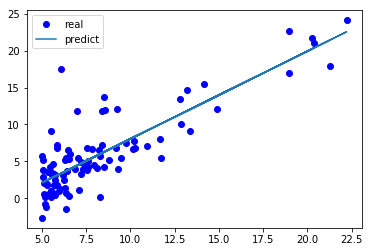

In [11]:
(X, Y) = loadDataSet('data/ex1.txt')

m, n = X.shape
rate = 0.02
maxLoop = 1500
epsilon = 0.01

X = np.concatenate((np.ones((m,1)), X), axis=1)
Y = Y.reshape(m, 1)

print("X_shape: ",X.shape)
print("X: \n", X[:3,:])
print("Y_shape: ",Y.shape)
print("Y: \n", Y[:3,:])

w, errors, w_set = bgd(rate, maxLoop, epsilon, X, Y)

print("w: \n",w)

Y_hat = []
for i in range(m):
    Y_hat.append(h(w,X[i, :]))

plt.plot(X[: , 1], Y, 'bo', label='real')
plt.plot(X[: , 1], Y_hat, label='predict')
plt.legend()

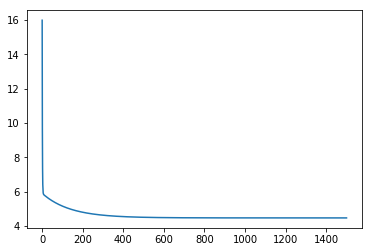

In [5]:
# 误差曲线
plt.plot(range(len(errors)), errors)

In [6]:
from mpl_toolkits.mplot3d import Axes3D

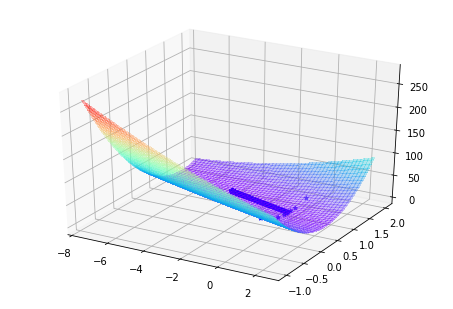

In [7]:
size = 100
w0_vals = np.linspace(-7.5,2.5,size)
w1_vals = np.linspace(-1,2,size)
L_vals = np.zeros((size,size))
for i in range(size):
    for j in range(size):
        col = np.array([ [w0_vals[i]], [w1_vals[j]] ])
        L_vals[i,j] = L(col, X, Y)
w0_vals, w1_vals = np.meshgrid(w0_vals, w1_vals)
L_vals = L_vals.T

fig=plt.figure() 
ax3d=Axes3D(fig)
ax3d.plot_surface(w0_vals, w1_vals, L_vals,  rstride=2, cstride=2, alpha=0.3,
            cmap=plt.cm.rainbow, linewidth=0, antialiased=False)
# ax3d.plot(w[0], w[1], 'rx')
L_set = []
for i in range(len(w_set[0])):
    cur_w = np.array([w_set[0][i], w_set[1][i]])
    cur_w = cur_w.reshape(2,1)
    L_set.append(L(cur_w, X, Y))
ax3d.scatter(w_set[0], w_set[1], L_set, c='b',marker="*")